In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("MarketPricePrediction.csv")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [4]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10222    False
10223    False
10224    False
10225    False
10226    False
Length: 10227, dtype: bool

In [5]:
df['date'] = pd.to_datetime(df['date'])
df

C:\Users\hp\AppData\Local\Temp\ipykernel_18844\1621113520.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,2011-12-01
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,2012-12-01
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,2013-12-01
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,2014-12-01


In [6]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np

In [18]:
avg_price_over_time = df.groupby('date')['quantity'].mean()

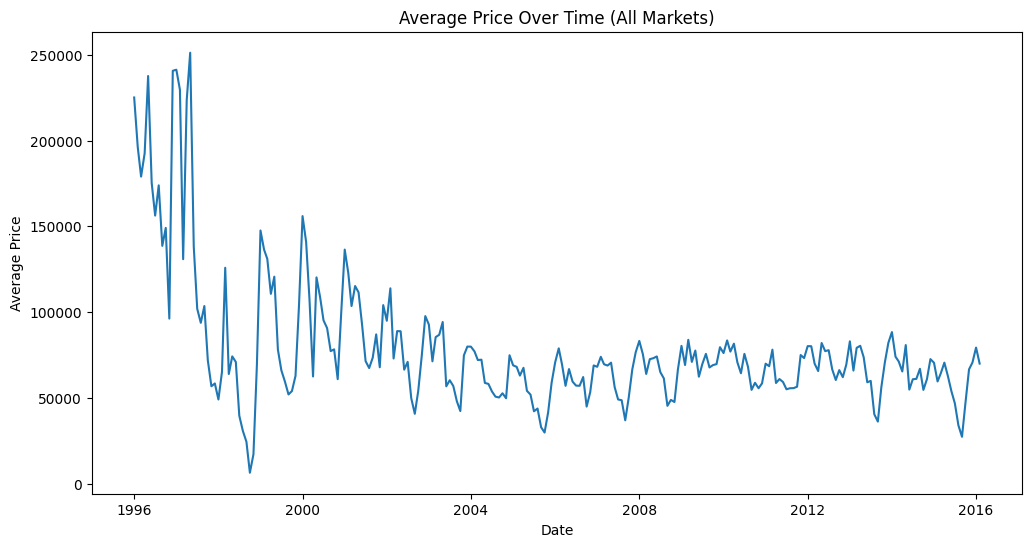

In [19]:
# Plot the average price over time
plt.figure(figsize=(12, 6))
plt.plot(avg_price_over_time.index, avg_price_over_time.values)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time (All Markets)')
plt.show()

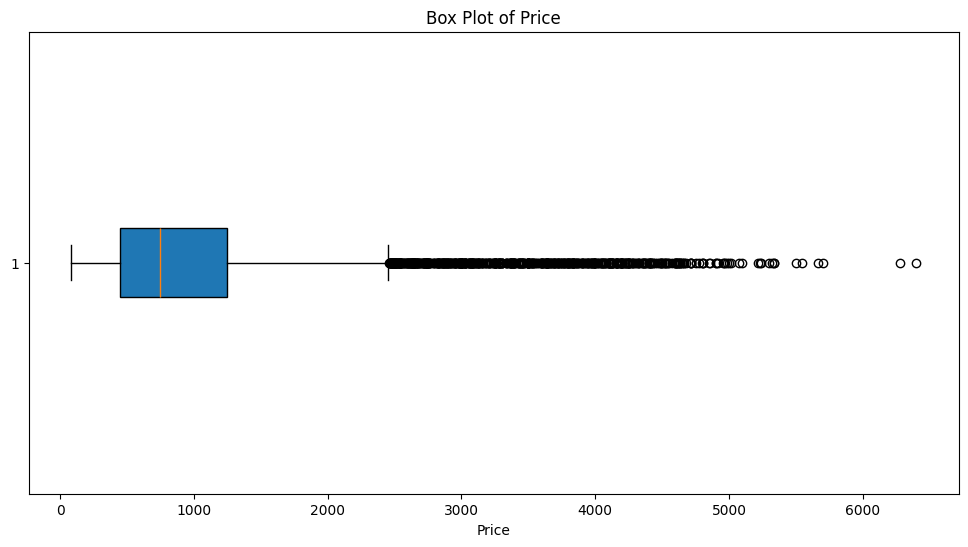

In [20]:
# Create a box plot for price
plt.figure(figsize=(12, 6))
plt.boxplot(df['priceMod'], vert=False, patch_artist=True)
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

In [21]:
# Calculate z-scores
z_scores = np.abs((df['priceMod'] - df['priceMod'].mean()) / df['priceMod'].std())

# Identify potential outliers
outliers = df[z_scores > 3]

# Print or analyze the outliers
print(outliers)

           market      month  year  quantity  priceMin  priceMax  priceMod  \
60     ABOHAR(PB)     August  2013      1072      3364      3959      3718   
67     ABOHAR(PB)  September  2013       575      4273      5109      4800   
74     ABOHAR(PB)    October  2013       400      2979      5079      4429   
187      AGRA(UP)  September  2013     30740      4098      4357      4225   
189      AGRA(UP)  September  2015     31830      3500      4468      4318   
...           ...        ...   ...       ...       ...       ...       ...   
10176   YEOLA(MS)     August  2013     68717      1425      3936      3638   
10178   YEOLA(MS)     August  2015     55819      1565      4841      4184   
10188   YEOLA(MS)  September  2013     30862      1719      5038      4633   
10190   YEOLA(MS)  September  2015     25374      1606      4621      4044   
10200   YEOLA(MS)    October  2013     16879      1334      4857      4224   

      state    city       date  
60       PB  ABOHAR 2013-08-01

In [22]:
df = df[z_scores <= 3]

In [23]:
avg_price_over_time = df.groupby('date')['priceMod'].mean()

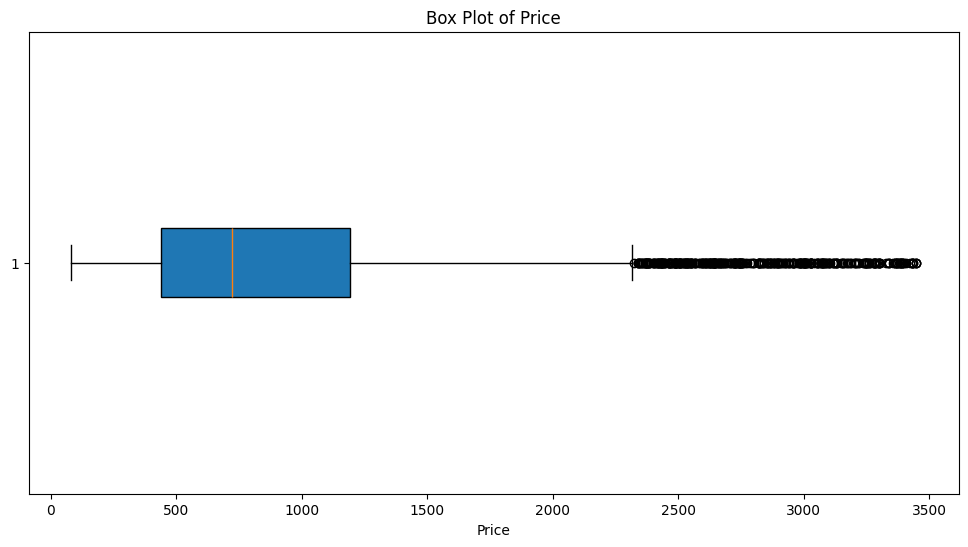

In [24]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['priceMod'], vert=False, patch_artist=True)
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

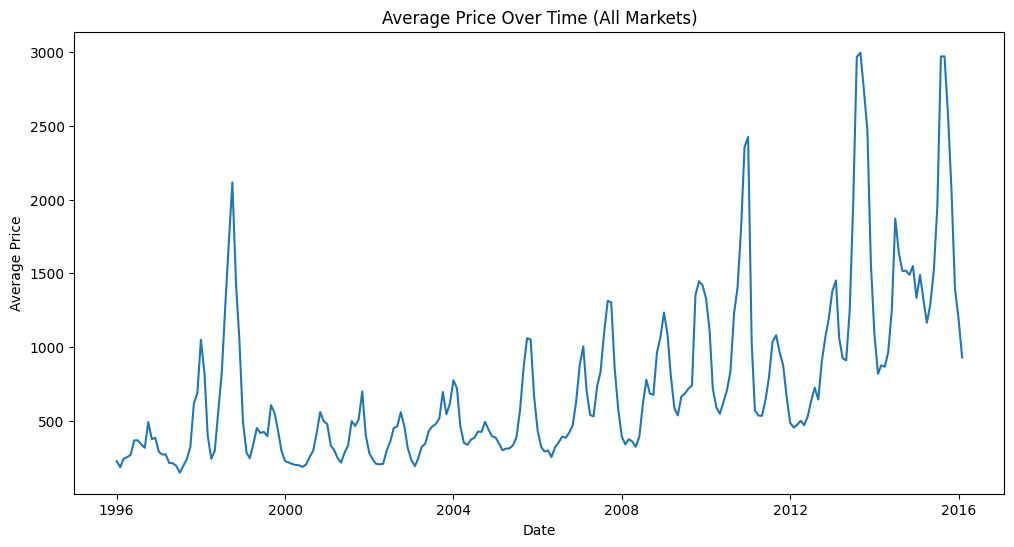

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(avg_price_over_time.index, avg_price_over_time.values)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time (All Markets)')
plt.show()

In [28]:
df = df.set_index('date')

In [29]:
train_data = df[:-int(len(df) * 0.2)]  # 80% for training
test_data = df[-int(len(df) * 0.2):]  # 20% for testing

In [30]:
train_avg_price_over_time = train_data.groupby('date')['priceMod'].mean()

test_avg_price_over_time = test_data.groupby('date')['priceMod'].mean()

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model 
# We'll fit separate ARIMA models 

model_priceMod = ARIMA(train_avg_price_over_time, order=(5, 1, 0))  
results_priceMod = model_priceMod.fit()
#  Make forecasts 
predictions_priceMod = results_priceMod.predict()

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

In [32]:
predictions_priceMod

1996-01-01       0.000000
1996-02-01     231.919739
1996-03-01     165.061835
1996-04-01     281.137055
1996-05-01     260.080294
                 ...     
2015-10-01    2717.751332
2015-11-01    2185.456093
2015-12-01    1700.101931
2016-01-01    1042.243075
2016-02-01    1320.072813
Freq: MS, Name: predicted_mean, Length: 242, dtype: float64

In [33]:
predictions_priceMod.index = pd.to_datetime(predictions_priceMod.index)

# Define the date range to drop
start_date = '1996-01-01'
end_date = '1997-06-30'

# Drop rows within the specified date range
filtered_predictions_priceMod = predictions_priceMod[
    ~((predictions_priceMod.index >= start_date) & (predictions_priceMod.index <= end_date))
]

# Print the filtered DataFrame to verify the result
print(filtered_predictions_priceMod)

filtered_predictions_priceMod.index = test_avg_price_over_time.index

1997-07-01    140667.893278
1997-08-01    178376.908064
1997-09-01    134935.435947
1997-10-01    141617.771197
1997-11-01    127269.182829
                  ...      
2015-10-01     41751.631357
2015-11-01     54864.187648
2015-12-01     68923.033421
2016-01-01     73379.382832
2016-02-01     73324.957008
Freq: MS, Name: predicted_mean, Length: 224, dtype: float64
1997-07-01     197.424357
1997-08-01     141.959336
1997-09-01     245.302916
1997-10-01     263.209457
1997-11-01     366.879733
                 ...     
2015-10-01    2717.751332
2015-11-01    2185.456093
2015-12-01    1700.101931
2016-01-01    1042.243075
2016-02-01    1320.072813
Freq: MS, Name: predicted_mean, Length: 224, dtype: float64


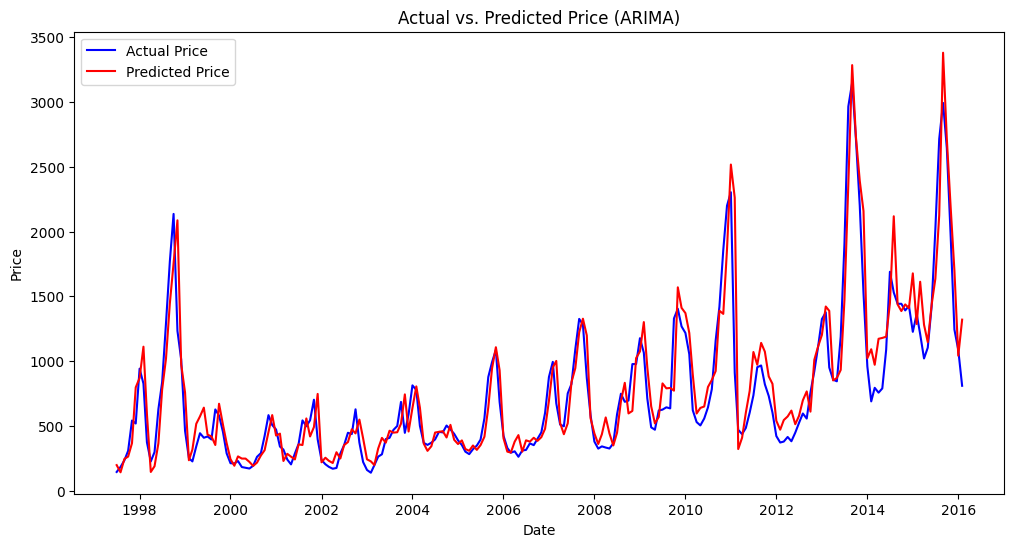

In [34]:
#  Create a plot
plt.figure(figsize=(12, 6))

#  Plot the actual values (test data)
plt.plot(test_avg_price_over_time, label='Actual Price', color='blue')


#  Plot the predicted values
plt.plot(filtered_predictions_priceMod, label='Predicted Price', color='red')

#  Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price (ARIMA)')
plt.legend()

#  Show the plot
plt.show()